In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster

In [2]:
v = 'v3'

In [3]:
linkage_matrix = np.load(f'/data/uscuni-ulce/processed_data/clusters/kmeans_linkage_{v}.npy')
cdata = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cdata_{v}.pq')
regional_ward_morphotopes_data = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cluster_input_data_{v}.pq')

In [4]:
from scipy.cluster.hierarchy import is_valid_linkage
assert is_valid_linkage(linkage_matrix)

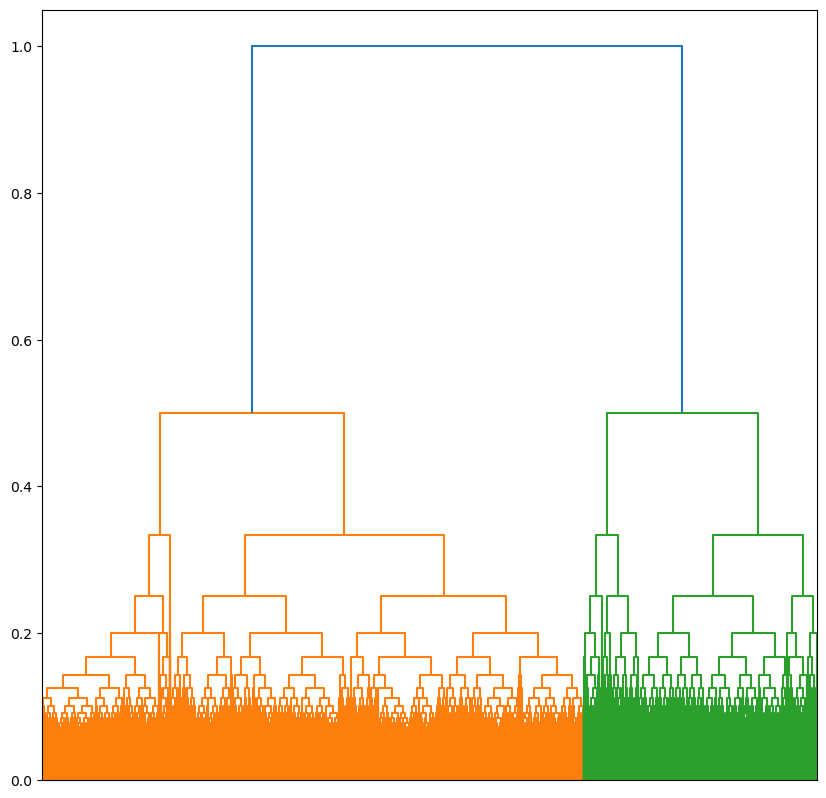

In [5]:
## final dendrogram

fig,ax = plt.subplots(figsize=(10,10))
_ = dendrogram(linkage_matrix, ax=ax, no_labels=True)

In [64]:
final_cutoff = .8 -0.00001
clusters = fcluster(linkage_matrix, t=final_cutoff, criterion='distance')
final_clusters = pd.Series(clusters, regional_ward_morphotopes_data.index)
final_clusters.value_counts()

1    46547
2    19947
Name: count, dtype: int64

In [65]:
x, y = regional_ward_morphotopes_data[final_clusters == 1].mean(), regional_ward_morphotopes_data[final_clusters == 2].mean()
((x - y) ** 2).sum()**(.5)

np.float64(6.49013643890673)

In [63]:
linkage_matrix

array([[8.38600000e+03, 8.38700000e+03, 5.88235294e-02, 2.00000000e+00],
       [2.03950000e+04, 6.64940000e+04, 6.25000000e-02, 3.00000000e+00],
       [2.03940000e+04, 6.64950000e+04, 6.66666667e-02, 4.00000000e+00],
       ...,
       [1.30460000e+05, 1.32983000e+05, 3.33333333e-01, 1.53280000e+04],
       [1.17657000e+05, 1.32984000e+05, 5.00000000e-01, 1.99470000e+04],
       [1.13039000e+05, 1.32985000e+05, 1.00000000e+00, 6.64940000e+04]])

In [7]:
total_median = regional_ward_morphotopes_data.median()

In [8]:
cluster_medians = regional_ward_morphotopes_data.groupby(final_clusters).median()

In [123]:
cluster_medians.loc[[13, 14]].style.background_gradient(axis=0, cmap="BuGn")

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbCor,ssbSqu,ssbERI,ssbElo,mtbSWR,libNCo,ldbPWL,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbSAl,sdsLen,sssLin,ldsMSL,ldsRea,ldsAre,sisBpM,sdsSPW,sdsSPO,sdsSWD,mtdDeg,lcdMes,linP3W,linP4W,linPDE,lcnClo,lddNDe,linWID,ldsCDL,xcnSCl,mtdMDi,sddAre,midRea,midAre,sdcLAL,sdcAre,sscCCo,sscERI,mtcWNe,mdcAre,ltcWRB,sicCAR,sdsAre,mibCou,mibAre,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS
13,0.579361,0.687935,-0.003878,0.024296,-0.544985,-0.083408,0.323543,0.107070,-0.930174,-0.073819,-0.196306,1.474222,0.685555,1.550450,1.572326,0.179882,-0.055388,0.228541,0.167371,-0.642883,0.137852,-0.368416,0.673262,1.221049,0.055180,0.155092,-0.351275,0.047357,-0.382673,0.106707,-0.503887,-0.382388,-0.793739,0.000220,-0.543954,0.002748,0.004899,-0.623647,0.080736,1.471969,1.248103,0.090844,-0.031338,-1.339553,1.300852,-0.932679,-1.108890,-0.016950,-0.390899,-0.041018,-0.164391,0.327332,0.592984,0.670466,-0.306300,-0.179646,-0.179646,-0.076793,-0.130233,2.000000
14,-0.084857,-0.028952,-0.003878,0.212590,-0.544985,-0.110829,0.456868,-0.000840,-0.930174,-0.073819,-0.220010,0.514866,0.309467,0.435865,0.511138,0.341090,0.170532,0.168638,0.633537,0.065257,0.360786,-0.212346,0.386629,0.973350,0.458467,0.155092,-0.476799,-0.020520,-0.394231,0.218375,-0.474004,-0.496654,-1.020671,0.195975,-0.543954,0.293612,0.261736,-0.013977,0.314173,0.396738,0.188168,0.034587,0.033610,-0.752757,0.222982,-0.785102,-0.844991,0.201868,-0.390899,-0.044567,-0.181853,0.228609,0.654075,0.514493,-0.347399,-0.408944,-0.408944,-0.125415,-0.154590,2.000000


In [10]:
from core.utils import used_keys
new_keys = used_keys.copy()
new_keys['limLPS'] = 'building structure optimised for sunlight'

In [11]:
results = {}
for i, row_data in cluster_medians.iterrows():
    diffs = row_data - total_median
    top_diffs = ((diffs) ** 2).sort_values().iloc[-20:]
    top_diffs = diaffs.loc[top_diffs.index].sort_values(ascending=False)
    top_diffs.index = [new_keys[k] for k in top_diffs.index]
    results[i] = top_diffs

In [134]:
diffs = cluster_medians.loc[12] - cluster_medians.loc[11]
top_diffs = ((diffs) ** 2).sort_values().iloc[-20:]
top_diffs = diffs.loc[top_diffs.index].sort_values(ascending=False)
top_diffs

ssbElo    0.620655
ssbCCo    0.415312
mibElo    0.354008
mtbAli    0.304933
sdsSWD    0.205764
ltbIBD    0.203568
linP4W   -0.273769
sscERI   -0.373046
sscCCo   -0.396430
ltcBuA   -0.479678
ldsCDL   -0.831073
ldsMSL   -0.963013
sdsAre   -1.327308
sddAre   -1.351840
sdsLen   -1.489417
mtdMDi   -1.572736
ldsAre   -1.819915
midAre   -1.858163
ldsRea   -1.925960
midRea   -2.119777
dtype: float64

In [137]:
new_keys['ldsRea']

'reached ETCs by local street network'

In [150]:
results[9]

total area of tess cells in node neigbhorhood            3.416564
area covered by node-attached ETCs                       3.300345
reached total ETC area by local street network           3.297136
area covered by edge-attached ETCs                       2.994977
area of ETC                                              2.994198
longest axis length of ETC                               2.964738
area covered by neighbouring cells                       2.815241
mean distance to neighbouring nodes of street network    2.802832
mean inter-building distance                             2.768114
mean segment length within 3 steps                       2.757124
mean distance between neighbouring buildings             2.675855
length of street segment                                 2.453655
openness of street profile                               2.045215
width of street profile                                  1.514996
local cul-de-sac length of street network                1.363555
level of b

In [1]:
cluster_descriptions = {
    "1 - Dense Connected Developments": "In this cluster, buildings frequently share walls forming row-like structures and occupy larger portions of the area. The density of blocks and local street connectivity are moderately high, while inter-building distances remain relatively small. Overall, this configuration yields a dense, tightly arranged environment.",
    "2 - Large Interconnected Blocks": "This cluster is characterized by a high count of connected buildings forming enclosed blocks with courtyards. The covered area ratio is notably high, while street corridors are relatively narrow, resulting in consolidated building formations.",
    "3 - Extensive Courtyard Complexes": "Developments in this cluster exhibit multiple courtyards, numerous connected buildings, and large perimeter walls. Building sizes vary significantly, creating expansive connected areas distinguished by substantial adjacency and courtyard presence.",
    "4 - Massive Connected Aggregations": "This cluster displays very large connected building areas, lengthy perimeter walls, and considerable variability in building sizes. The overall formation covers vast stretches of the built environment with substantial coverage.",
    "5 - Dense Standalone Buildings": "This cluster features a well-connected street layout with a notable proportion of multi-way intersections. Shared walls between buildings are less prevalent, reflecting a pattern of standalone structures within a street network robust network.",
    "6 - Compact Development": "Development in this cluster is characterised by a moderate number of buildings and relatively dense local street connectivity. Shared walls appear regularly, and Inter-building distances are relatively small, suggesting a compact layout.",
    "7 - Cul-de-Sac Layout": "This cluster is distinguished by a significant presence of cul-de-sacs and relatively modest building coverage. Although local node density is moderate, the overall street network is not highly interconnected.",
    "8 - Aligned Winding Streets": "Here, buildings exhibit a consistent alignment along streets of varying width. However, the overall street connectivity is lower than average, leading to a moderately ordered but less connected layout.",
    "9 - Sparse Rural Development": "Developments in this cluster have greater distances between buildings and street nodes. Streets are often wider, and adjacency is comparatively low.",
    "10 - Large Wide-Spaced Complexes": "This cluster is defined by substantial building footprints, relatively wide streets, and significant spacing between structures. Buildings in this cluster stand out for their size as well as their strong compactness, squareness and rectangularity.",
    "11 - Dispersed Linear Development": "This cluster exhibits long street segments, considerable distances between intersections, and minimal shared walls. The result is a dispersed layout with moderate development density, typically forming long linear villages.",
    "12 - Linear Development": "This cluster is characterized by lengthy street segments and higher distances between street intersections, albeit shorter than in the case of Dispersed Linear Development. Buildings are isolated, relatively small and far apart from each other. Overall the total built-up area in the development is low to moderate.",
    "13 - Sparse Open Layout": "Greater distances between buildings, fewer shared walls, and a lower coverage ratio are defining traits of this cluster. Streets remain relatively open, leading to a loosely structured environment. Overall the total built-up area in the development is low.",
    "14 - Sparse Road-Linked Development": "With larger spacing between buildings, fewer shared walls, and moderate to long street segments, this cluster highlights a relatively open pattern. Compared to other sparse development, there are fewer streets relative to the number of buildings, leading to a higher granularity.",
    "15 - Large Utilitarian Development": "This cluster consists of buildings with substantial footprints, wide street profiles, and notable variation in size. The design does not emphasize sunlight exposure, creating broad but less refined configurations, typical for industrial and other service areas.",
    "16 - Extensive Wide-Spaced Developments": "This cluster is marked by large building footprints, broad street profiles, and fewer shared walls. The resulting environment is spacious, with significant open areas between structures, typical for modernist housing.",
}

In [27]:
cluster_frame = []

for c in range(1, 8):
    clusters = fcluster(linkage_matrix, t=(1/c)-0.00001, criterion='distance')
    cluster_frame.append(pd.Series(clusters, regional_ward_morphotopes_data.index))

cluster_frame = pd.concat(cluster_frame, axis=1)
cluster_frame.columns = cluster_frame.columns + 1

In [41]:
mapping = cluster_frame.drop_duplicates()
assert (np.sort(mapping[7].unique()) == np.arange(1, 109)).all()

In [44]:
mapping.set_index(7).sort_index().to_parquet(f'/data/uscuni-ulce/processed_data/clusters/cluster_mapping_{v}.pq')

/home/krasen/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/pandas/io/parquet.py:480: UserWarning: The DataFrame has non-str index name `[7]` which will be converted to string and not roundtrip correctly.
  impl.write(


In [67]:
mapping = mapping.set_index(7).sort_index()

### Distances

In [46]:
from core.interactive_dendrogram import get_original_observations

n = linkage_matrix.shape[0] + 1
links_to_calculate = linkage_matrix[linkage_matrix[:, 2] >= 1/7]

In [66]:
results = {}
for link in links_to_calculate:
    left, right, dist = int(link[0]), int(link[1]), link[2]
    left_obs, right_obs = get_original_observations(linkage_matrix, left, n), get_original_observations(linkage_matrix, right, n)
    x = regional_ward_morphotopes_data.iloc[left_obs].median()
    y = regional_ward_morphotopes_data.iloc[right_obs].median()
    cluster_dists = ((x - y) ** 2).sum()**(.5)
    results[(left, right)] = cluster_dists
    

In [67]:
# i = -2
# left, right, dist = int(links_to_calculate[i, 0]), int(links_to_calculate[i, 1]), links_to_calculate[i, 2]
# should be np.float64(7.051120220030015)

In [68]:
results

{(71103, 73469): np.float64(4.631438099471403),
 (74381, 76531): np.float64(4.313397652797818),
 (73470, 76532): np.float64(4.819816205185427),
 (15926, 47679): np.float64(159.28181365313333),
 (76533, 76534): np.float64(192.5852492621677),
 (76716, 77488): np.float64(9.583827364827894),
 (77498, 77505): np.float64(29.70576043090057),
 (77489, 77506): np.float64(44.57460352347593),
 (62099, 77507): np.float64(260.8929653501374),
 (76535, 77508): np.float64(8.711251926335793),
 (3022, 56359): np.float64(36.31404485621644),
 (48005, 59033): np.float64(31.675686613502833),
 (33905, 77511): np.float64(37.27722321802809),
 (77510, 77512): np.float64(66.18677059304397),
 (17995, 39891): np.float64(70.0318506889132),
 (62200, 77514): np.float64(116.40725374095372),
 (77513, 77515): np.float64(150.74890001434284),
 (77509, 77516): np.float64(107.30869032035186),
 (78226, 78414): np.float64(2.8875428878430864),
 (78746, 79700): np.float64(2.8091897475135124),
 (78415, 79701): np.float64(2.64033

### Plotting

In [143]:
import lonboard
from sidecar import Sidecar
from core.cluster_validation import get_color

regional_clusters = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/final_clusters_{v}.pq')[0]
final_colors = pd.DataFrame(get_color(final_clusters.values), final_clusters.values).drop_duplicates()
final_colors.loc[-1] = [255,255,255]

In [139]:
final_colors[final_colors != 6] = [255,255,255]

In [106]:
region_id = 69333

In [107]:
etcs = gpd.read_parquet(f"/data/uscuni-ulce/processed_data/clusters/clusters_{region_id}_{v}.pq")
etcs['final'] = etcs['morph'].map(lambda x: final_clusters.loc[regional_clusters.loc[x]] if x in regional_clusters else -1)
etcs['regional'] = etcs['morph'].map(lambda x: regional_clusters.loc[x] if x in regional_clusters else "-1")

In [108]:

layer = lonboard.SolidPolygonLayer.from_geopandas(etcs, opacity=.7)


sc = Sidecar(title=f'Final Clusters')
m = lonboard.Map(layer, basemap_style=lonboard.basemap.CartoBasemap.DarkMatter)
with sc:
    display(m)

layer.get_fill_color = final_colors.loc[etcs.final].values.astype('uint8')

/home/krasen/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


In [149]:
target = 9
final_colors[final_colors.index != target] = [0,0,0]
final_colors[final_colors.index == target] = [255,255,255]

layer.get_fill_color = final_colors.loc[etcs.final].values.astype('uint8')